# LangGraph 를 이용한 Prompt Flow 

In [1]:
# Used for this tutorial; not a requirement for LangGraph
# %pip install -U langchain_anthropic
# ! pip install --upgrade langgraph

In [2]:
import getpass
import os


def _set_env(var: str):
    if not os.environ.get(var):
        os.environ[var] = getpass.getpass(f"{var}: ")


_set_env("ANTHROPIC_API_KEY")

#### 그래프 정의
- State 정의
- 사용할 모델 정의
- 그래프 빌더 정의
- 노드, 에지 정의
- 그래프 컴파일

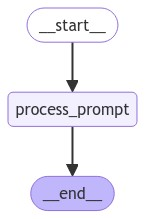

In [8]:
from typing import TypedDict, Annotated
from langgraph.graph import StateGraph, START, END
from langchain_anthropic import ChatAnthropic
from langchain_core.messages import HumanMessage

# Stage 정의
class State(TypedDict):
    prompt: Annotated[str, "실행할 프롬프트"]
    response: Annotated[str, "AI의 응답"]

# 모델 정의
def get_llm_model(model_id):
    llm = ChatAnthropic(model=model_id)

    return llm

# 프롬프트 처리 노드 정의
def process_prompt(state: State) -> State:
    llm = get_llm_model(model_id="claude-3-haiku-20240307")
    prompt = state["prompt"]
    print("prompt: \n", prompt)
    response = llm.invoke([HumanMessage(content=prompt)])
    return {"prompt": prompt, "response": response.content}

# 그래프 정의
graph_builder = StateGraph(State)

# 노트, 에지 생성
graph_builder.add_node("process_prompt", process_prompt)
graph_builder.add_edge(START, "process_prompt")
graph_builder.add_edge("process_prompt", END)
# 그래프 컴파일
graph = graph_builder.compile()

from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass



### 그래프를 실행할 함수 정의

In [9]:
def run_prompt(prompt: str):
    inputs = {"prompt": prompt}
    result = graph.invoke(inputs)
    return result["response"]




### 메인: 그래프 실행

In [10]:
# 테스트용 프롬프트
test_prompts = [
    "인공지능이 사회에 미칠 긍정적인 영향을 서술해주세요."
]

for i, prompt in enumerate(test_prompts, 1):
    print(f"\n프롬프트 {i}: {prompt}")
    response = run_prompt(prompt)
    print(f"응답: {response}")

# 아래 동작 안함
# def run_prompt_stream(prompt: str):
#     inputs = {"prompt": prompt}
#     for output in graph.stream(inputs):
#         if output and "response" in output:
#             yield output["response"]    

# for i, prompt in enumerate(test_prompts, 1):
#     print(f"\n프롬프트 {i}: {prompt}")
#     print("응답: ", end="", flush=True)
#     for chunk in run_prompt_stream(prompt):
#         print(chunk, end="", flush=True)
#     print()  # 줄바꿈을 위해


프롬프트 1: 인공지능이 사회에 미칠 긍정적인 영향을 서술해주세요.
prompt: 
 인공지능이 사회에 미칠 긍정적인 영향을 서술해주세요.


응답: 인공지능의 발전은 사회 전반에 걸쳐 많은 긍정적인 영향을 미칠 것으로 기대됩니다. 몇 가지 대표적인 영향은 다음과 같습니다:

1. 생산성 향상: 인공지능 기술은 반복적이고 단순한 작업의 자동화를 통해 인간의 생산성을 크게 높일 수 있습니다. 이를 통해 기업의 경쟁력 향상과 더불어 근로자들의 업무 효율성 증대를 기대할 수 있습니다.

2. 의료 분야 혁신: 인공지능은 의료 분야에서 정확한 진단, 맞춤형 치료, 신약 개발 등에 활용되어 의료 서비스의 질을 향상시킬 수 있습니다. 이는 환자의 치료 효과 개선과 의료 비용 절감에 기여할 것입니다.

3. 교육의 개선: 인공지능 기술은 개인의 학습 패턴을 분석하여 맞춤형 학습 콘텐츠와 방식을 제공함으로써 교육의 질적 향상을 도모할 수 있습니다. 이를 통해 학습자의 능력 개발과 교육 기회의 균등화를 이룰 수 있습니다.

4. 삶의 질 향상: 인공지능은 안전, 교통, 에너지, 환경 등 다양한 분야에서 인간의 일상생활을 편리하고 안전하게 개선할 수 있습니다. 이를 통해 궁극적으로 삶의 질 향상과 지속가능한 발전을 달성할 수 있습니다.

이처럼 인공지능 기술은 인간의 생활에 다양한 긍정적인 변화를 가져올 것으로 기대되며, 이를 통해 사회 전반의 발전을 이끌어갈 수 있을 것입니다.
